# Performance vs clustering with clusTCR

In [1]:
# Imports
import os

import numpy as np
import pandas as pd
import plotnine as pn

# Set directory
os.chdir('path_to_your_dir')


/var/folders/h1/5mmv2z5n7xz9rwls3g_gr7580000gn/T/ipykernel_2102/3609553964.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Get performance metrics
def get_values(tcrex,epitope,column):
    return tcrex[tcrex['epitope']==epitope][column].tolist()[0]

tcrex = pd.read_csv('./data/parsed/tcrex_models.csv')

In [3]:
# Read in clusters and their sizes
clusters = pd.read_csv('./results/epitope_specific_clustering/epitope_specific_clusters.tsv')

# Count nr of clustered TCRs per epitope
clusters = clusters[['epitope','size']]
nr = clusters.groupby('epitope').sum()
nr = nr.rename(columns={'size':'clustered_tcrs'})

# Get mean cluster size per epitope
cluster_mean = clusters.groupby('epitope').mean()
cluster_mean = cluster_mean.rename(columns={'size':'mean'})

# Get median cluster size per epitope
cluster_median = clusters.groupby('epitope').median()
cluster_median = cluster_median.rename(columns={'size':'median'})

# Combine nr of clustered TCRs and mean, median statistics in one df
final = pd.concat([nr,cluster_mean,cluster_median], axis=1)
final = final.reset_index()
final

,epitope,clustered_tcrs,mean,median
0,ALSKGVHFV,14,2.800000,2.0
1,ALSQYHVYV,21,2.333333,2.0
2,AMFWSVPTV,17,2.428571,2.0
3,ARMILMTHF,9,2.250000,2.0
4,ATDALMTGY,41,4.100000,3.0
...,...,...,...,...
107,YIFFASFYY,8,2.000000,2.0
108,YLDAYNMMI,32,2.909091,2.0
109,YLNTLTLAV,47,2.764706,2.0
110,YLQPRTFLL,149,10.642857,2.5


In [4]:
# Add TCRex statistics to the df
final['roc'] = final['epitope'].apply(lambda x: get_values(tcrex,x,'roc_auc'))
final['Average precision'] = final['epitope'].apply(lambda x: get_values(tcrex,x,'average_precision'))
final['accuracy'] = final['epitope'].apply(lambda x: get_values(tcrex,x,'accuracy'))
final['data_size'] = final['epitope'].apply(lambda x: get_values(tcrex,x,'nr_target_sequences'))
final['%clustered'] = (final['clustered_tcrs']/final['data_size'])*100
final.sort_values(by='data_size')

,epitope,clustered_tcrs,mean,median,roc,Average precision,accuracy,data_size,%clustered
85,RYPLTFGWCF,2,2.000000,2.0,0.719444,0.423672,0.516667,30,6.666667
75,QASQEVKNW,4,4.000000,4.0,0.603439,0.308862,0.583333,31,12.903226
101,TTLPVNVAF,2,2.000000,2.0,0.652645,0.264128,0.515079,31,6.451613
82,RLRPGGKKK,12,2.400000,2.0,0.888624,0.729341,0.733333,31,38.709677
31,HPVGEADYFEY,11,3.666667,2.0,0.859487,0.680011,0.715128,32,34.375000
...,...,...,...,...,...,...,...,...,...
14,FLNGSCGSV,652,5.821429,2.0,0.856637,0.562842,0.614679,2332,27.958834
22,FVDGVPFVV,288,3.310345,2.0,0.772613,0.374998,0.536901,2420,11.900826
23,GILGFVFTL,969,7.878049,2.0,0.810882,0.591206,0.677843,3107,31.187641
72,NLVPMVATV,668,3.408163,2.0,0.724659,0.393736,0.559782,4812,13.881962


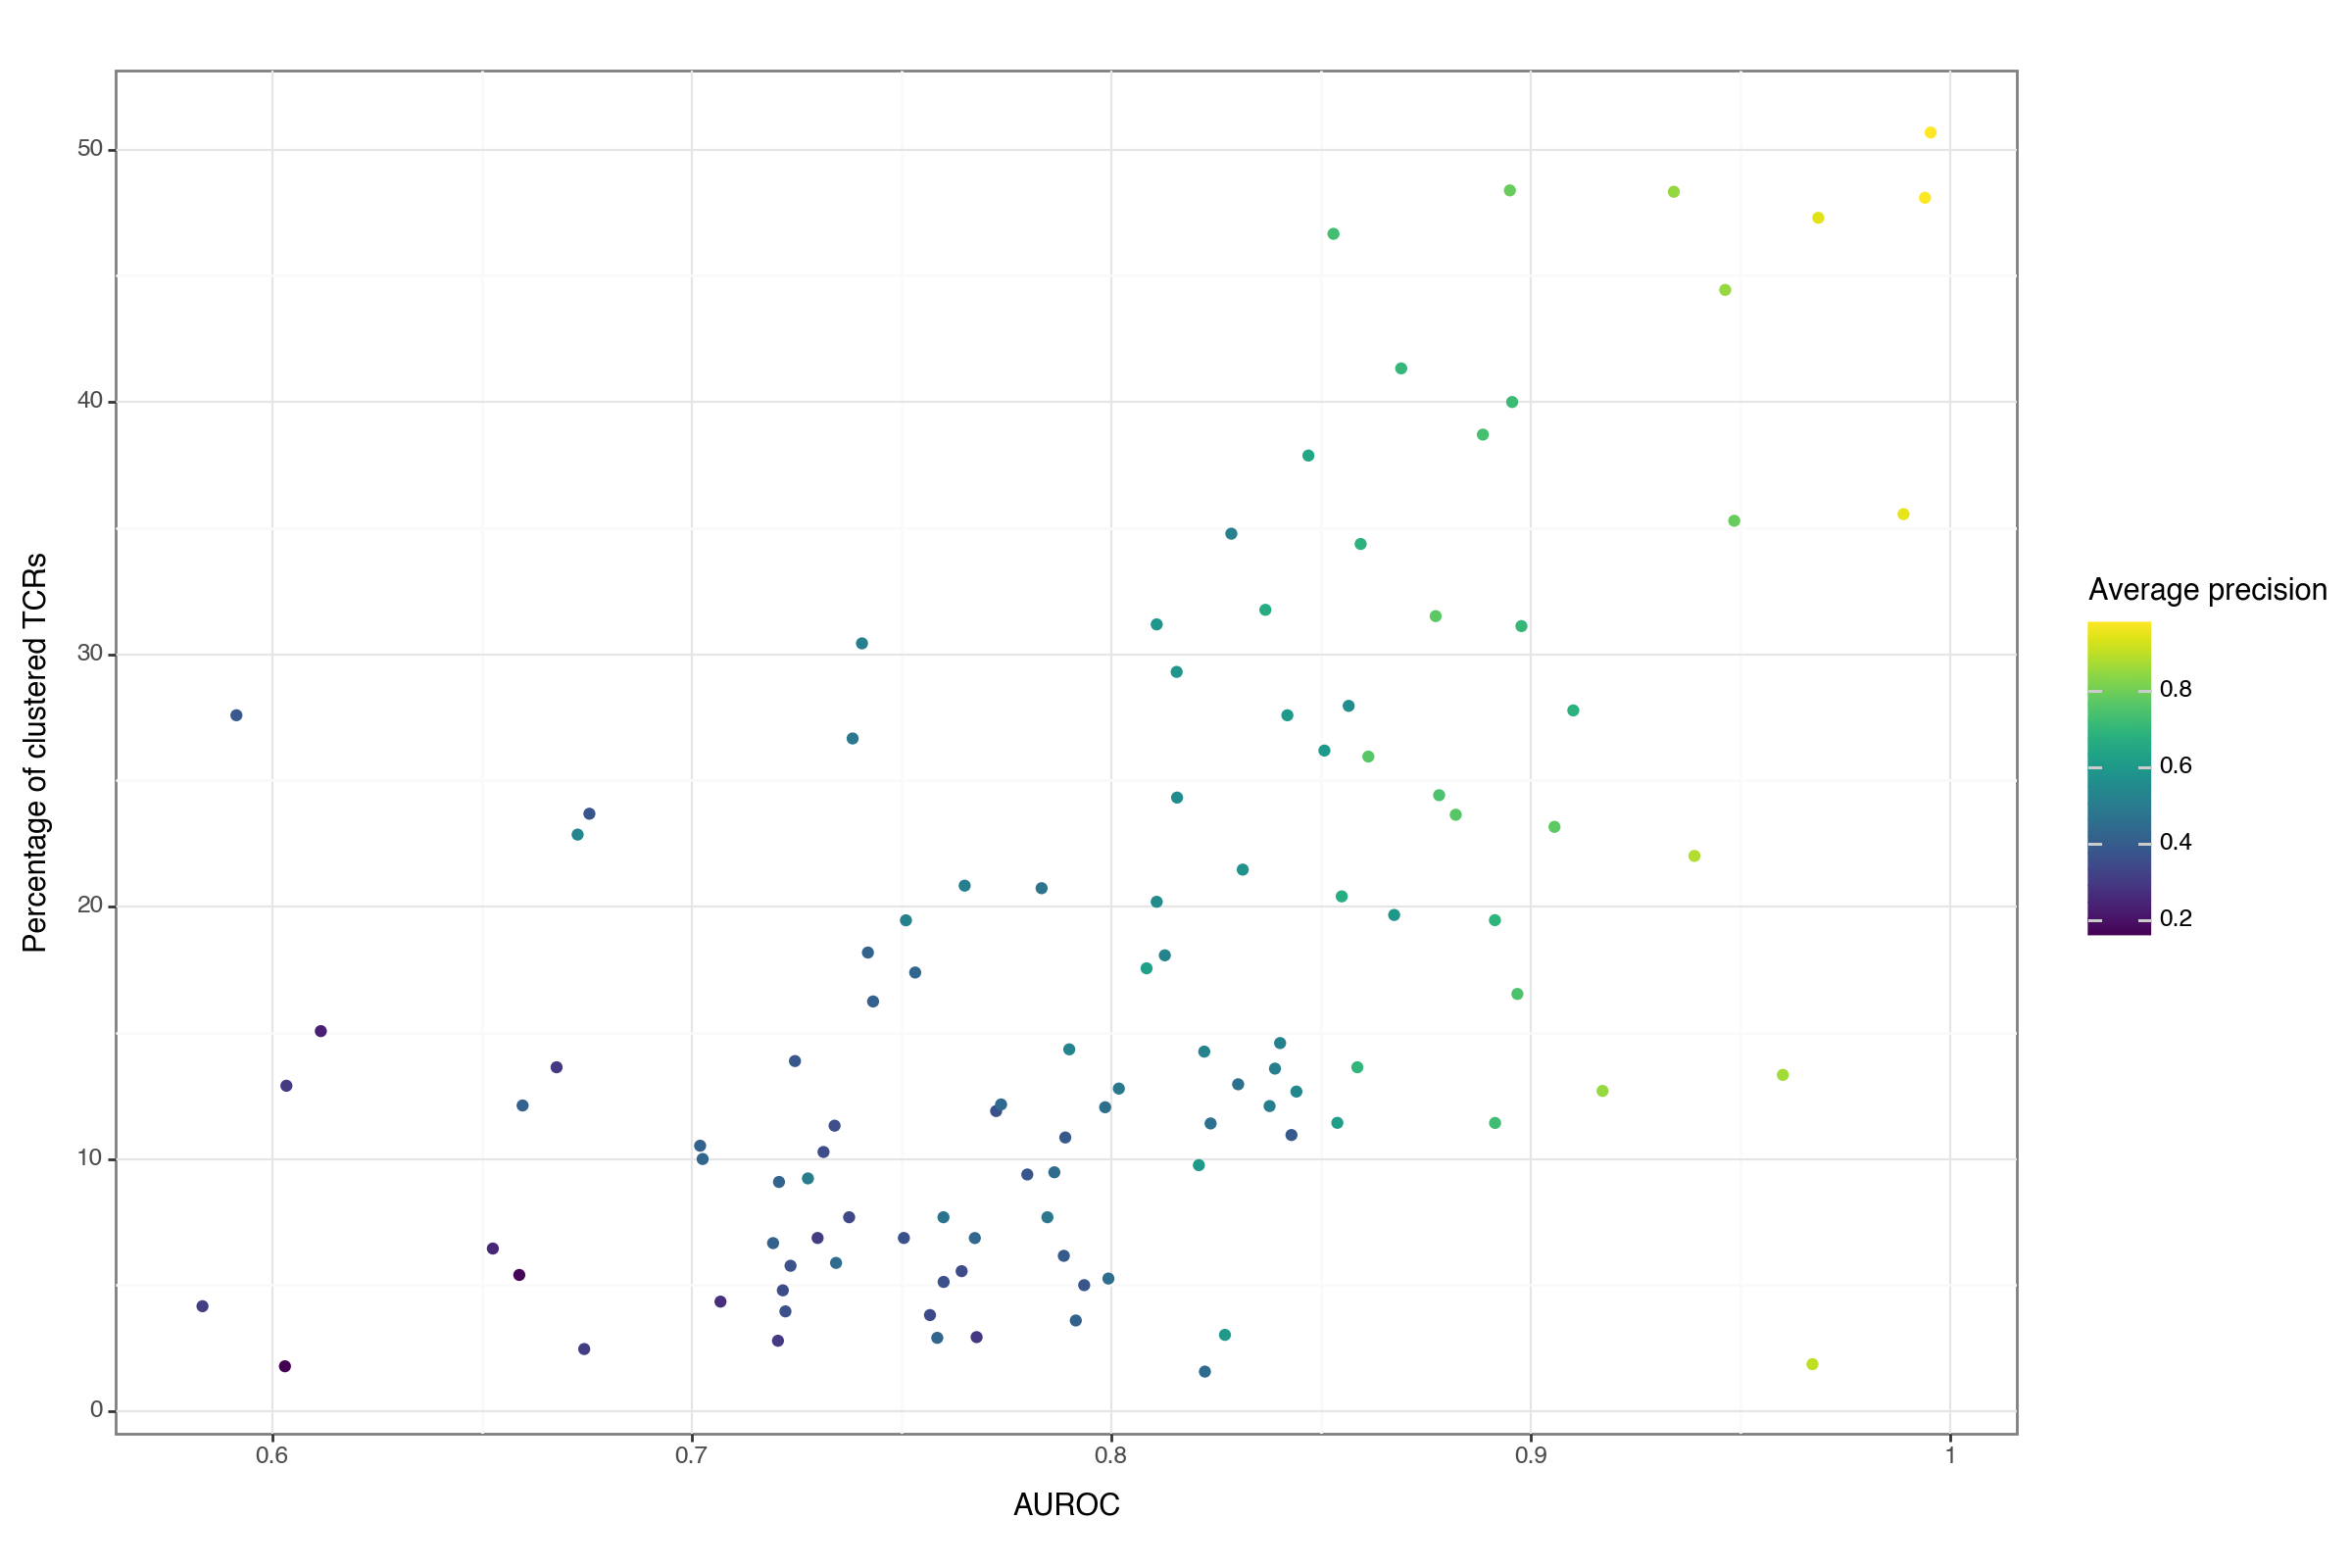

In [5]:
fig = (pn.ggplot(final, pn.aes('roc','%clustered',colour='Average precision',label='epitope')) + 
       pn.geom_point() +
       #pn.geom_text(angle=90,size=5,color='black')+ # Adds epitope names to plot
       pn.labels.ylab('Percentage of clustered TCRs') +
       pn.labels.xlab('AUROC') +
       pn.theme_bw() +
       pn.theme(figure_size=(12, 8))).draw(show=True)

fig.savefig('./figures/cluster_performances/percentage_clustered_tcrs.pdf', dpi=300)


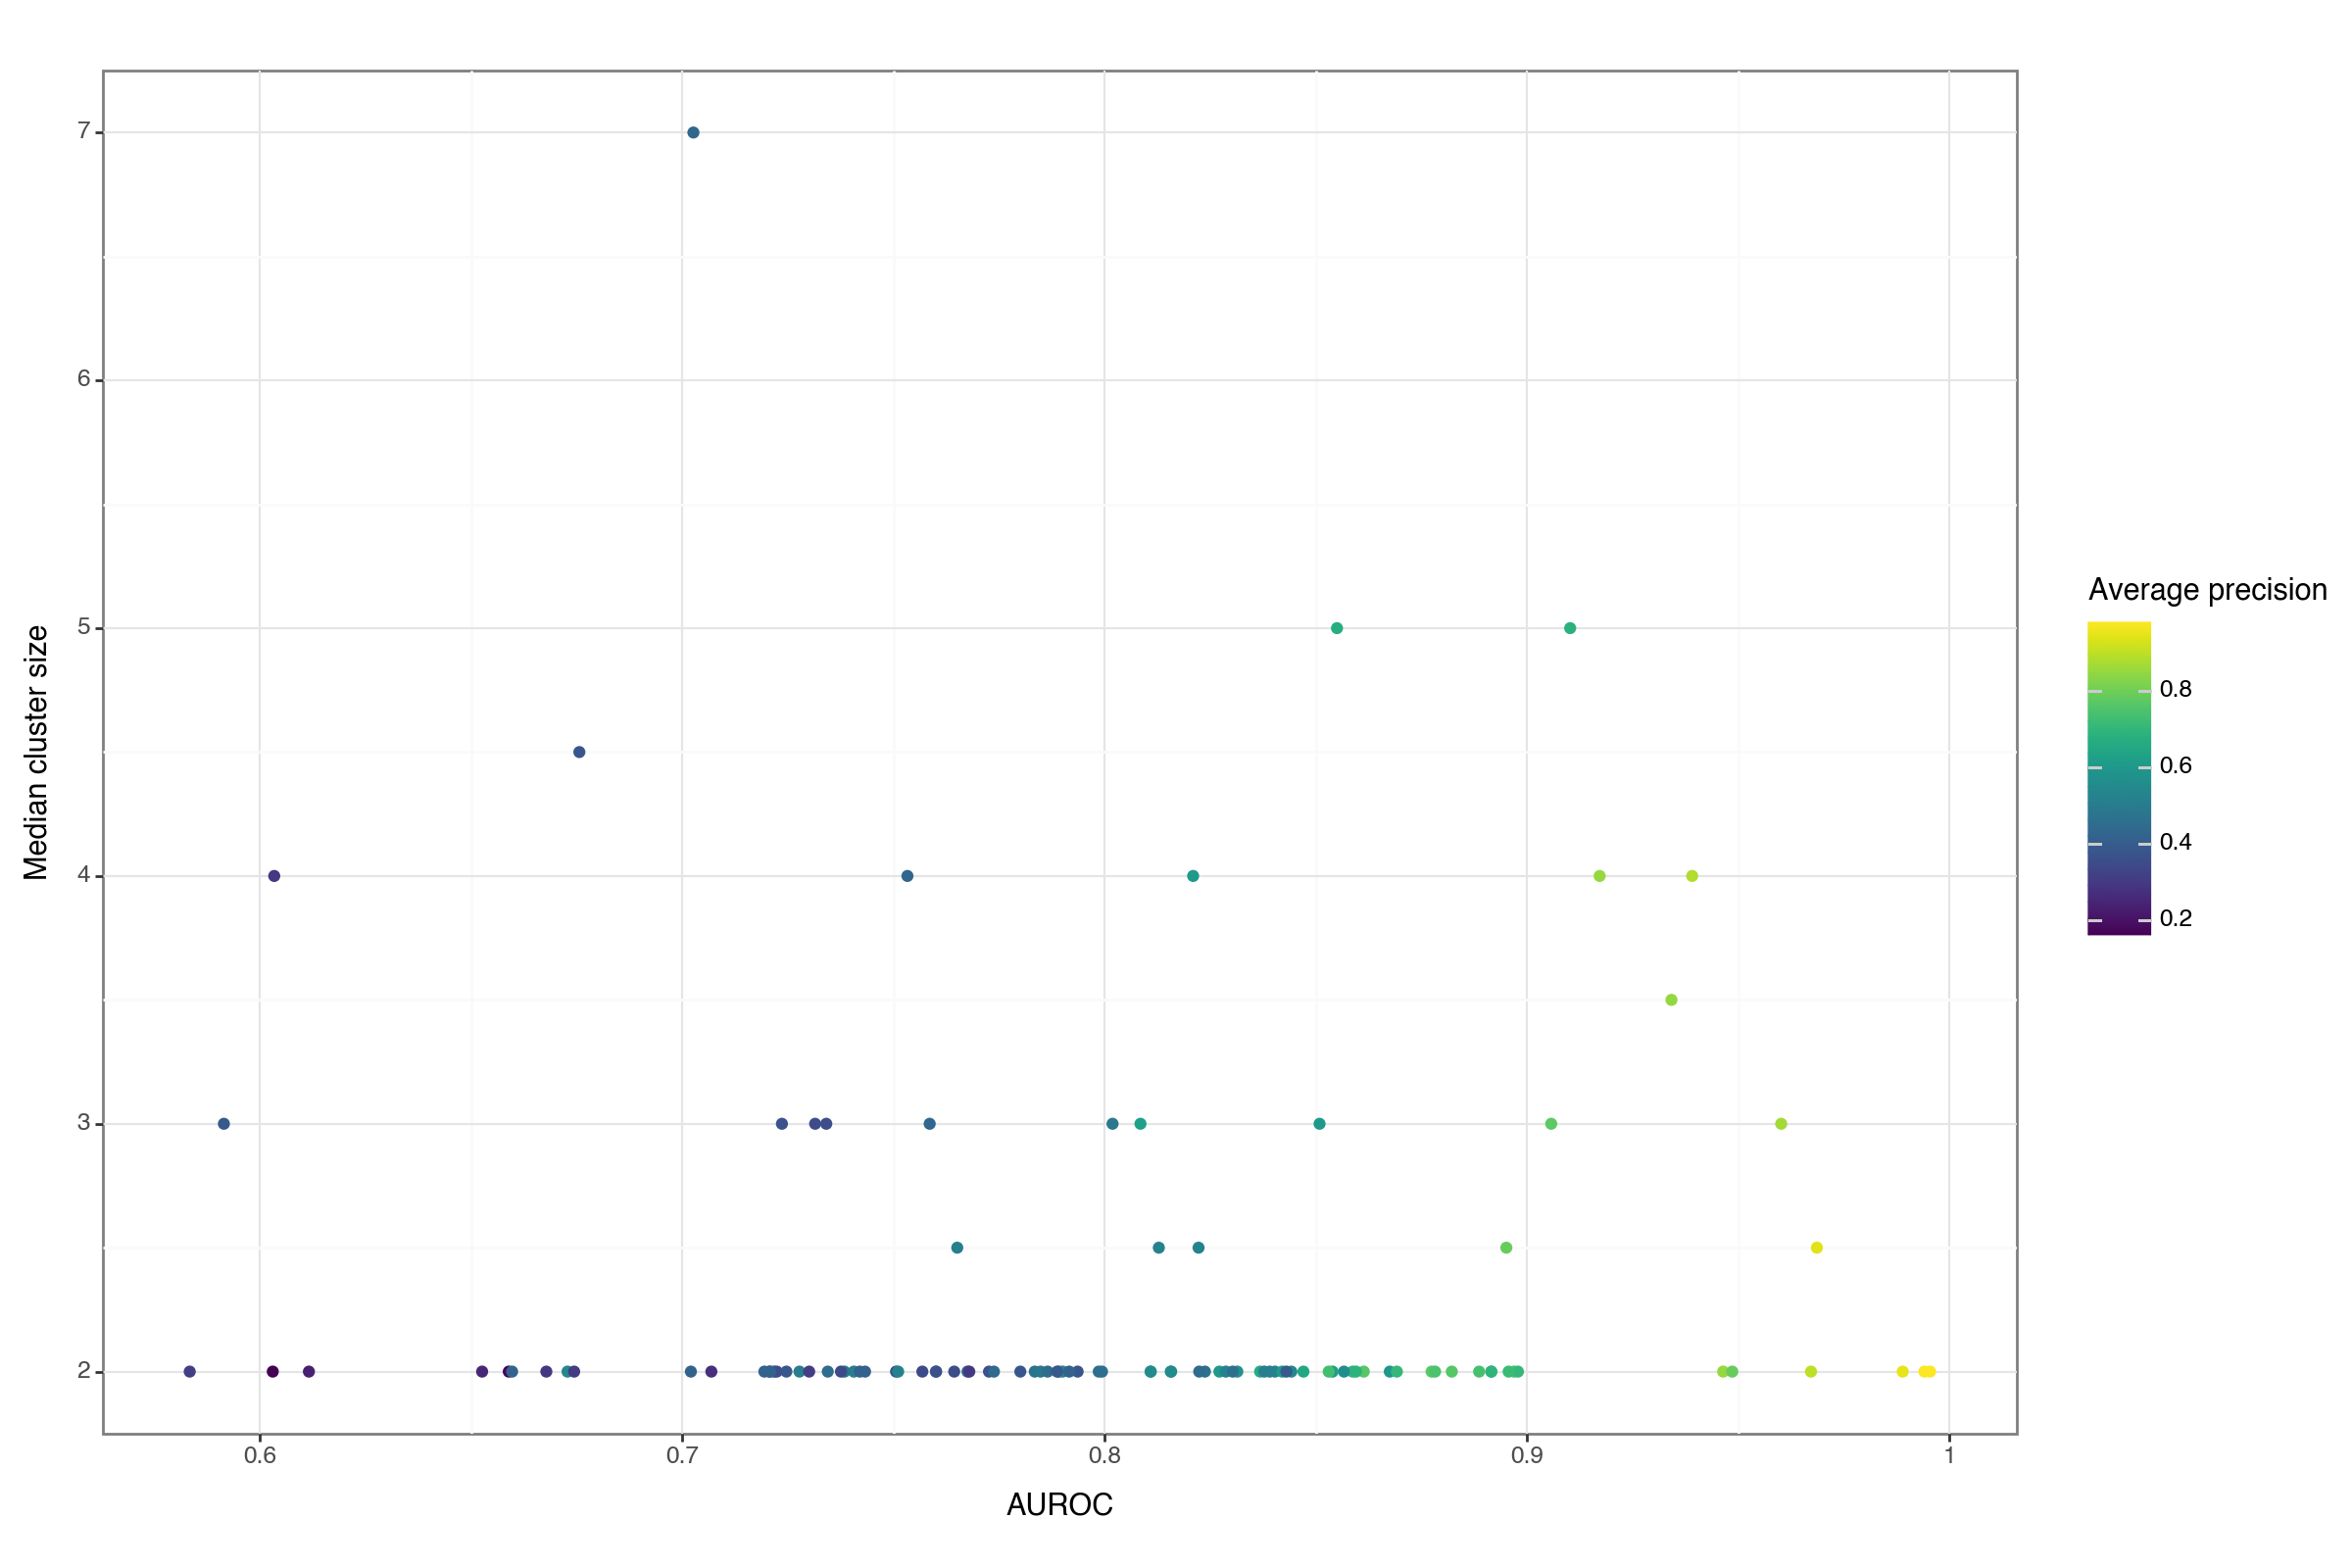

In [6]:
fig = (pn.ggplot(final, pn.aes('roc','median',colour='Average precision',label='epitope')) + 
       pn.geom_point() +
       #pn.geom_text(angle=90,size=5,color='black')+ # Adds epitope names to plot
       pn.labels.ylab('Median cluster size') +
       pn.labels.xlab('AUROC') +
       pn.theme_bw() +
       pn.theme(figure_size=(12, 8))).draw(show=True)

fig.savefig('./figures/cluster_performances/median_cluster_size.pdf', dpi=300)

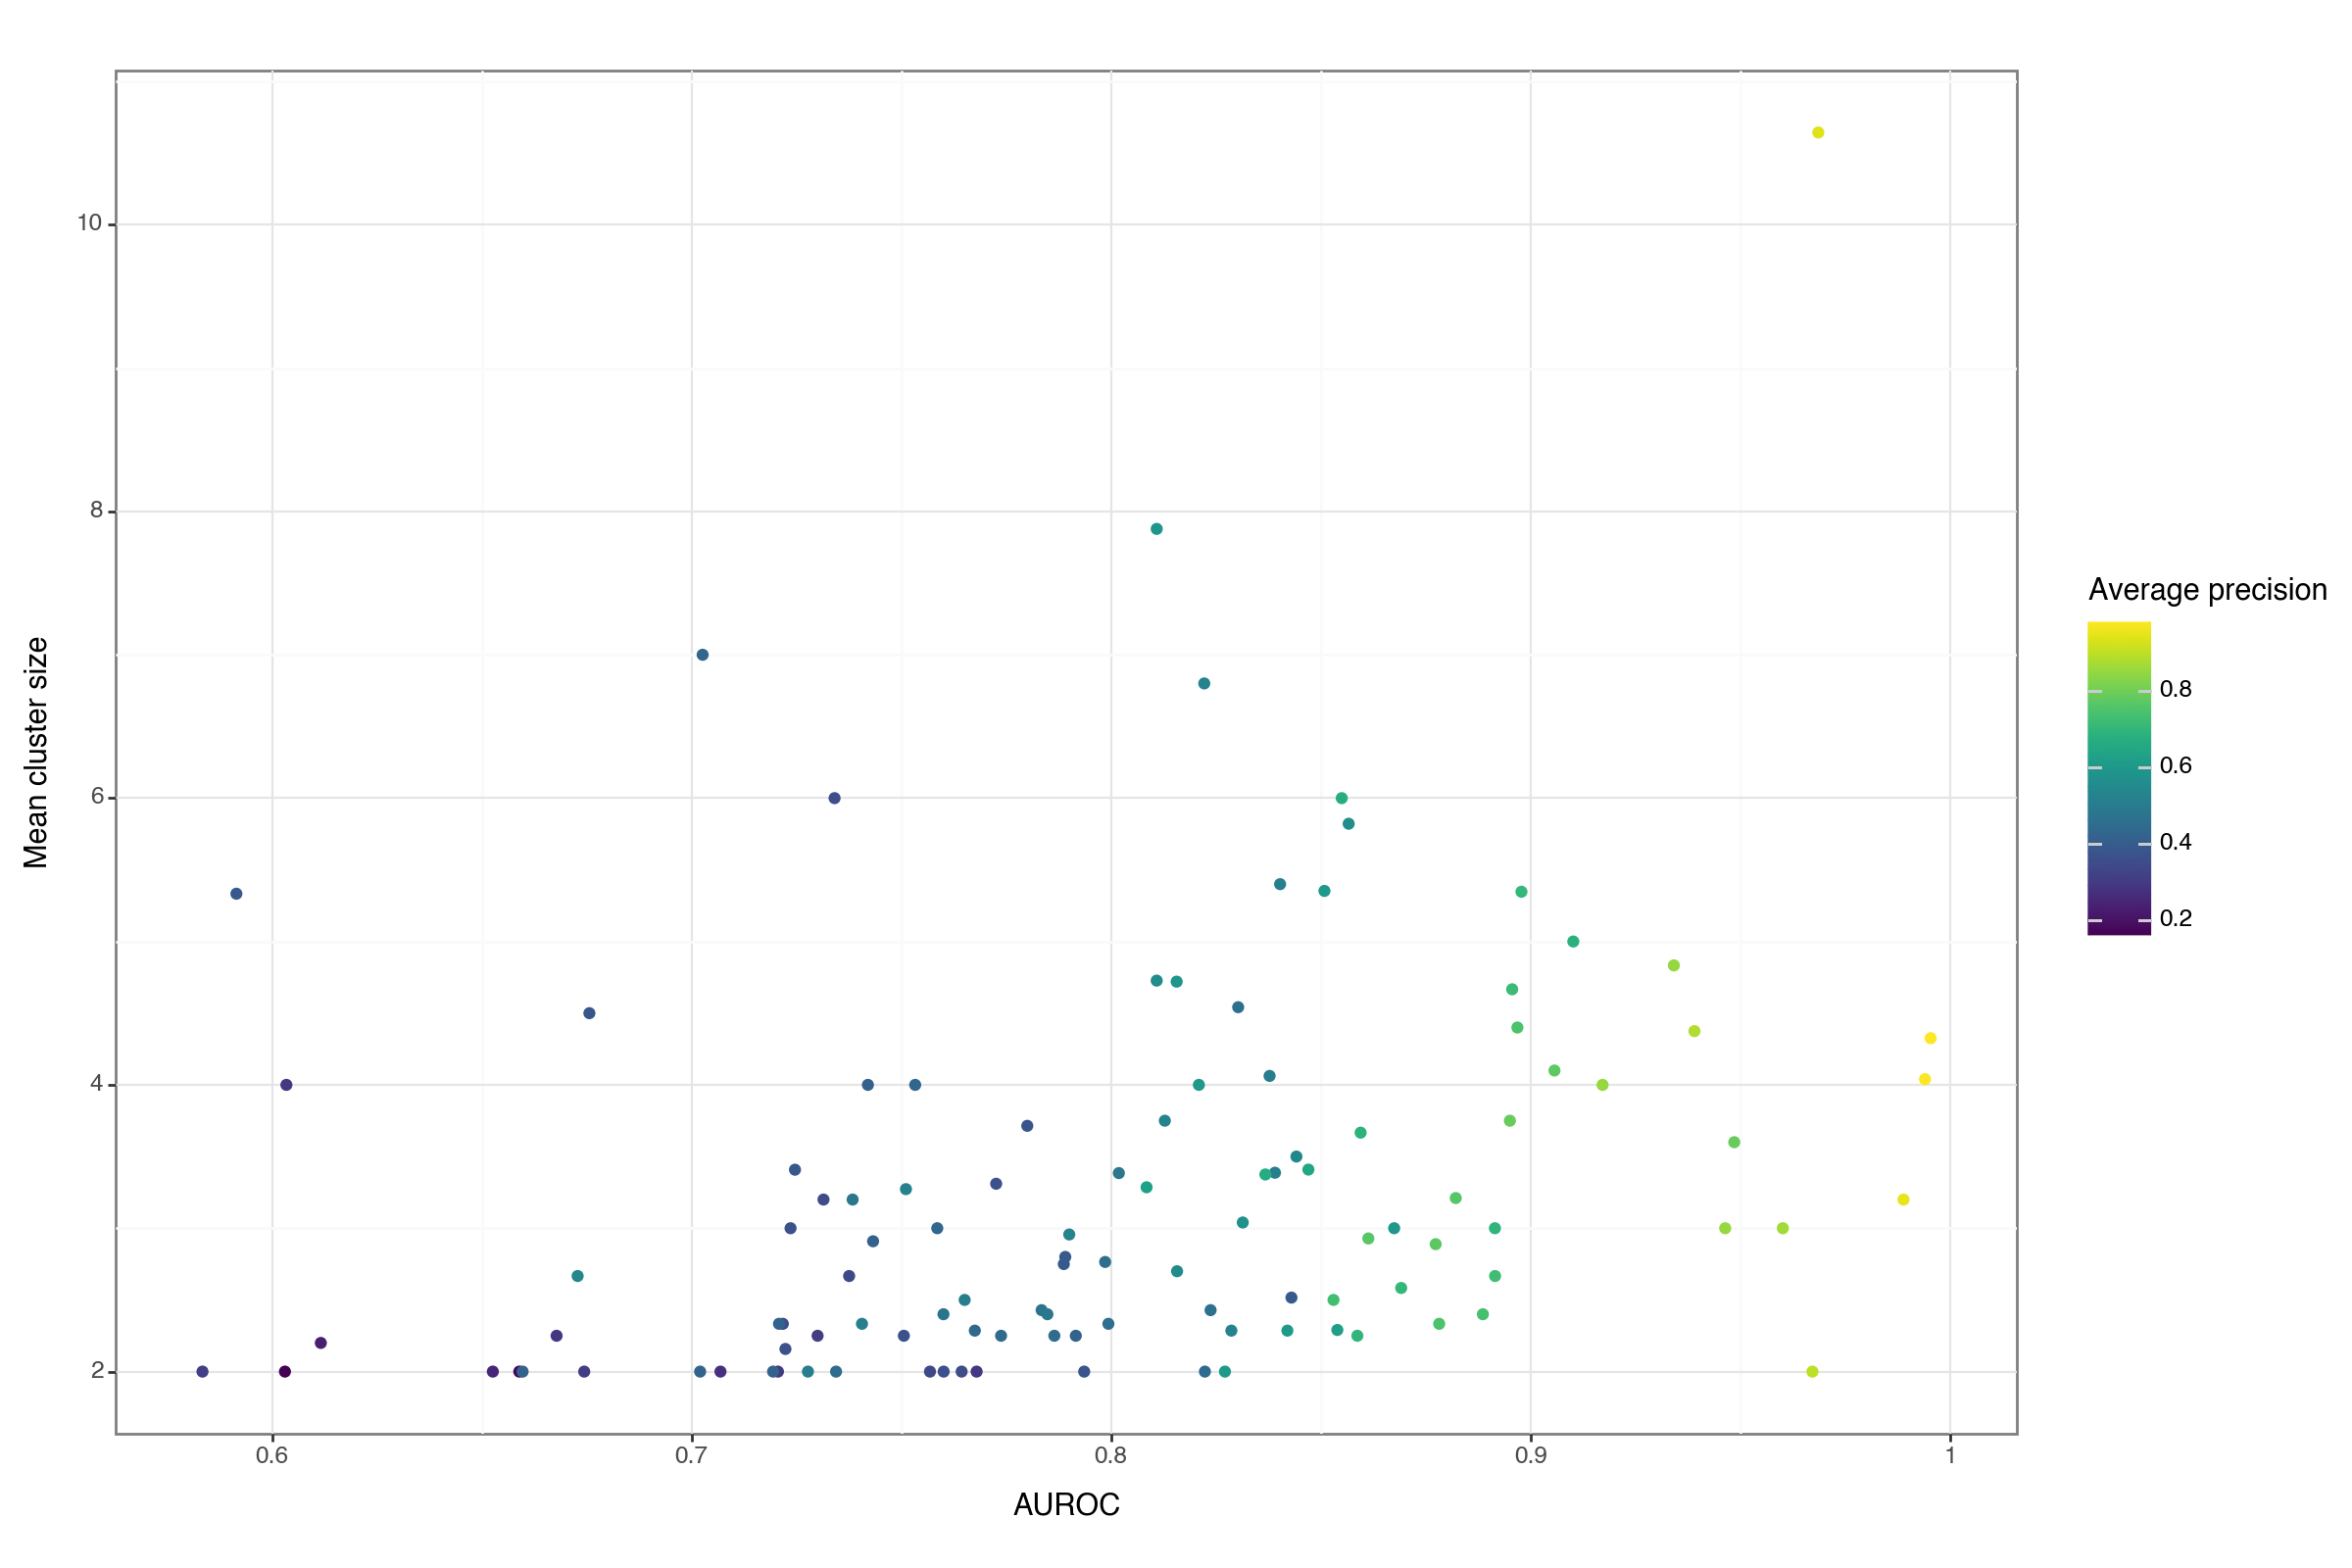

In [7]:
fig = (pn.ggplot(final, pn.aes('roc','mean',colour='Average precision',label='epitope')) + 
       pn.geom_point() +
       #pn.geom_text(angle=90,size=5,color='black')+ # Adds epitope names to plot
       pn.labels.ylab('Mean cluster size') +
       pn.labels.xlab('AUROC') +
       pn.theme_bw() +
       pn.theme(figure_size=(12, 8))).draw(show=True)
fig.savefig('./figures/cluster_performances/mean_cluster_size.pdf', dpi=300)